In [2]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame

fla = pd.read_csv('Florida_2.csv')
#fla.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BorrID,LoanStatus,GrossApproval,SBAGuarantee,PctOfGuarantee,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"TARCA, INC..",3754 NW 54TH STREET,MIAMI,FL,33142,308,CHGOFF,1900000,1425000,0.75,...,423120,Motor Vehicle Supplies and New Parts Merchant ...,5,OTH 7A,Guaranty,TotalBank,100 SE 2nd St,MIAMI,FL,33131
1,Around the Clock Fitness,1242 SW Pine Island.,Cape coral,FL,33991,8127,PIF,521800,469620,0.90,...,713990,All Other Amusement and Recreation Industries,20,PLP,Guaranty,"Newtek Small Business Finance, Inc.",1981 Marcus Avenue,LAKE SUCCESS,NY,11042
2,"Integrated Metering Systems, I","11701 South Belcher Road, Sui",Largo,FL,33773,4025,PIF,40800,34680,0.85,...,335311,"Power, Distribution, and Specialty Transformer...",23,PLP,Guaranty,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901
3,Loving Enterprises Inc and 2 P,7885 Boca Ciega Drive,SAINT PETERSBURG,FL,33706,7228,PIF,332000,249000,0.75,...,453220,"Gift, Novelty, and Souvenir Stores",21,PLP,Guaranty,"PNC Bank, National Association",222 Delaware Ave,WILMINGTON,DE,19801
4,Lawrence J. Roberts & Associat,249 Catalonia Avenue.,Coral gables,FL,33134,1508,EXEMPT,225000,112500,0.50,...,541110,Offices of Lawyers,3,SBA EXPRES,FA$TRK (Small Loan Express),TotalBank,100 SE 2nd St,MIAMI,FL,33131


In [4]:
naics = fla.loc[fla['NaicsCode'] == 541211]

In [5]:
# X used "LoanStatus", "SBAGuarantee",
X = naics[["PctOfGuarantee","DebtCoverage", "Leverage", "PctOfPrinColl","GrossApproval" ]]
y = naics["SBAGuarantee"]
print(X.shape, y.shape)

(134, 5) (134,)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=73)

X_train.head()

,PctOfGuarantee,DebtCoverage,Leverage,PctOfPrinColl,GrossApproval
14487,0.90,2.25,4.0,1.0,320000
8452,0.50,1.40,5.0,0.3,20000
4809,0.75,1.00,4.0,0.3,345000
14579,0.50,2.25,4.0,1.0,50000
9959,0.50,1.00,4.0,0.3,250000


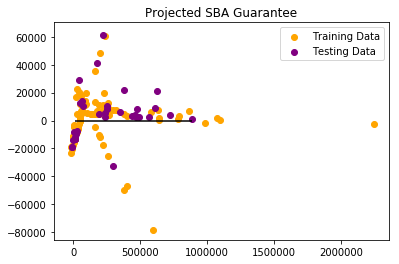

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="orange", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Projected SBA Guarantee")
plt.show()

In [29]:
sum(model.predict(X_test) - y_test)

125630.77441653541

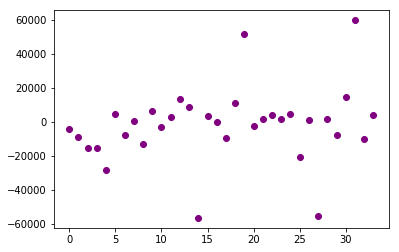

In [18]:
plt.scatter(range(0, len(y_test)), model.predict(X_test) - y_test, c="purple", label="Testing Data")
plt.show()

In [19]:
# Overall Score for the model
model.score(X, y)

0.99664110494668756

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 305706868.10936546
R-squared (R2 ): 0.9966411049466876


In [11]:
one_naics = fla[fla['NaicsCode'] == 541211]

In [12]:
one_naics.groupby('NaicsCode')['COAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
NaicsCode,,,,,,,,
541211,134.0,15718.91791,90950.661419,0.0,0.0,0.0,0.0,804264.0


In [16]:
one_naics.groupby('NaicsCode')['COAmount'].mean()

NaicsCode
541211    15718.91791
Name: COAmount, dtype: float64

In [14]:
one_naics[['BorrName', 'GrossApproval', 'SBAGuarantee', 'PrinBalanceCollected', 'COAmount']].head(10)

,BorrName,GrossApproval,SBAGuarantee,PrinBalanceCollected,COAmount
140,"R.E. Janosko & Associates, LLC",20000,17000,7471.0,12529
142,"Tim Wheat, CPA, PA",749000,674100,278499.0,470501
208,"Stephen P. Barnier, Jr., LLC",282000,211500,71562.0,210438
220,"Merle F. Henry, C.P.A., P.A.",20000,10000,4688.0,15312
518,Cooper Taxes & Accounting Serv,10000,9000,10000.0,0
670,CSJ TAX &amp; ACCOUNTING SERVI,10000,5000,3000.0,0
691,"Sumter & Associates, LLC",241000,180750,241000.0,0
766,"ANITA B. BURGAY, CPA, P.A.",70000,35000,21000.0,0
780,"BANOS, GARCIA, AND ASSOCIATES,",50000,25000,15000.0,0
806,"Miami Business Solutions, Inc.",35000,17500,10500.0,0
